In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,\
KFold, LeaveOneOut, StratifiedKFold,ParameterGrid

from sklearn.metrics import mean_squared_error, ConfusionMatrixDisplay, confusion_matrix,\
    mean_absolute_error,plot_roc_curve, r2_score, f1_score, \
    accuracy_score,auc, roc_auc_score, roc_curve, RocCurveDisplay,\
    recall_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import time

import imblearn

from imblearn.over_sampling import SMOTE
import imblearn.pipeline as imb_pipeline

import sklearn

from collections import Counter
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.cross_decomposition import PLSRegression
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.feature_selection import f_regression, SelectKBest, VarianceThreshold, SelectFromModel
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
import datetime as dt
from scipy import stats
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans, MeanShift
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import matplotlib.cm

from sklearn.metrics import fbeta_score, make_scorer



import pandas as pd
import numpy as np
import scipy as sp
import sqlite3
from collections import Counter
    
import os



from analysis_lib.manager import plot_curve, DataManager, rf_init




# experiment section 



# gridsearch

## data manager creation

In [2]:
def accuracy_on_minority(y_test, y_pred, labels=["below_than_avg", "higher_than_avg"], 
                         pos_label="higher_than_avg"):
    
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #print(cm)
    print(cm.diagonal())
    val = cm.diagonal()[1]
    #print(val, " ", np.isnan(val))
    if np.isnan(val):
        return 0
    return val
f1_minority = make_scorer(f1_score, average="binary", pos_label="higher_than_avg")
scorer = make_scorer(accuracy_on_minority,pos_label="higher_than_avg")
f1_binary = make_scorer(f1_score,pos_label="higher_than_avg", average='binary')


recall = make_scorer(recall_score,pos_label="higher_than_avg")
precision = make_scorer(sklearn.metrics.precision_score,pos_label="higher_than_avg")
misclf_error = make_scorer(sklearn.metrics.zero_one_loss)
f1_macro = make_scorer(f1_score, average="macro")







anomalous_nuts = ["FI20","ES64", "FRY5","ES63","BG32", "BG42"] # "MT00", "LU00"
nuts2_to_remove_scandinavia = ['SE11', 'SE12', 'SE21', 'SE22', 'SE23', 'SE31', 'SE32', 'SE33']
NUTS_to_remove =  anomalous_nuts + nuts2_to_remove_scandinavia 

start_date="2020-08-20" #"DATE MUST BE FORMATTED AS "YEAR-MONTH-DAY"
end_date="2021-02-20"
k_smote = 6

n_clusters = 2
clust_method='ML'
prob_type = "classification"

dm = DataManager(start_date=start_date,
                        end_date=end_date,
                            n_clusters=n_clusters,
                            clust_method=clust_method,
                         nuts2_to_remove=NUTS_to_remove,
                        sqlite_file_path="covid_at_lombardy.sqlite",
                        clf_type="binary",
                         prob_type="classification",
                         response="cumulativepositive",
                        dest_folder="ki_cv_ALLFEAT") 


X, y = dm.get_dataset()
X_train_full, X_test, y_train_full, y_test =  dm.get_train_test_split(test_size=0.3, shuffle=True)

/home/xrh1/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


/home/xrh1/Desktop/covidlombardy/analysis_lib/utils.py:170: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5) )


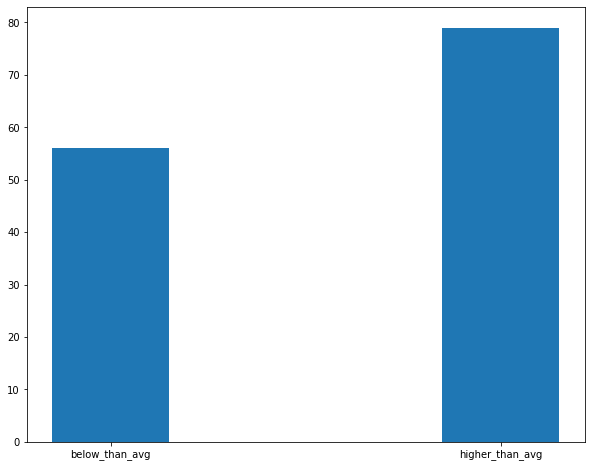

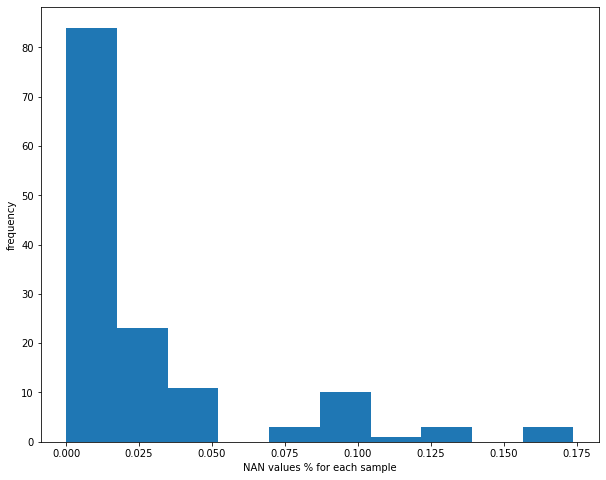

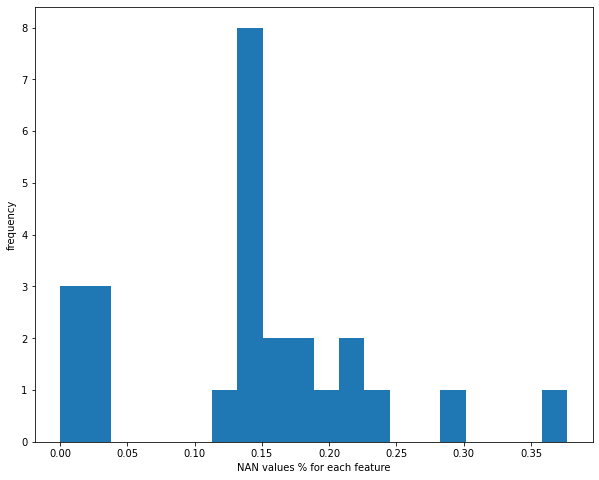

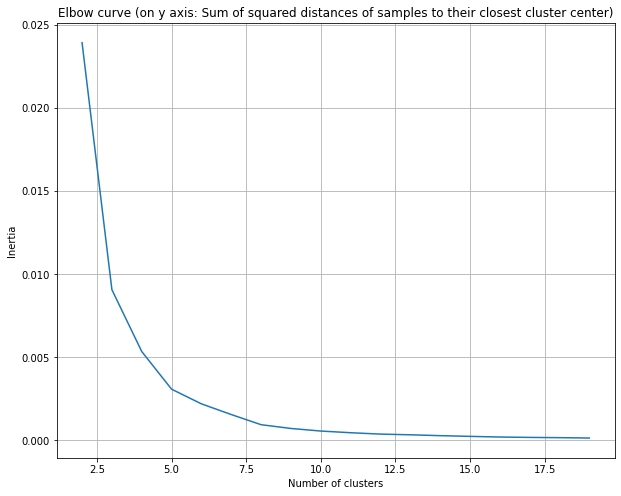

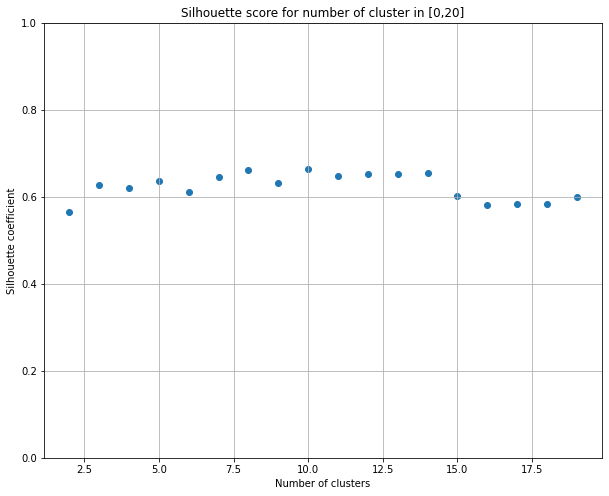

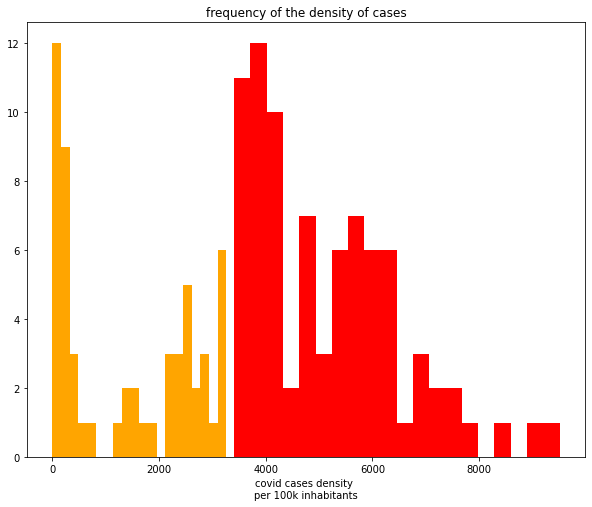

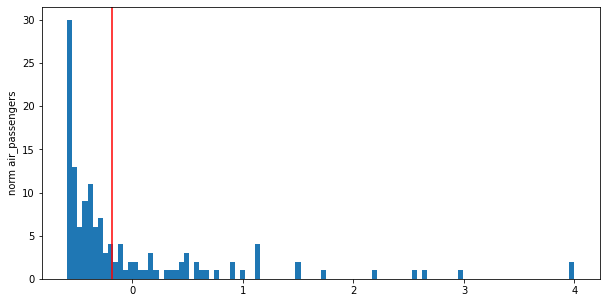

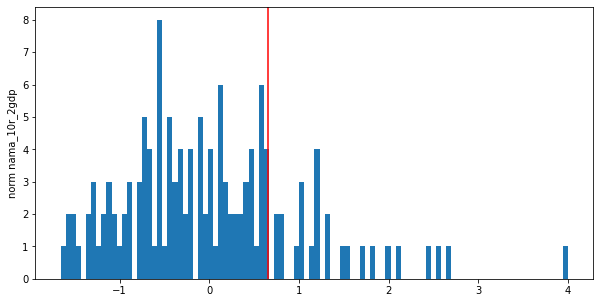

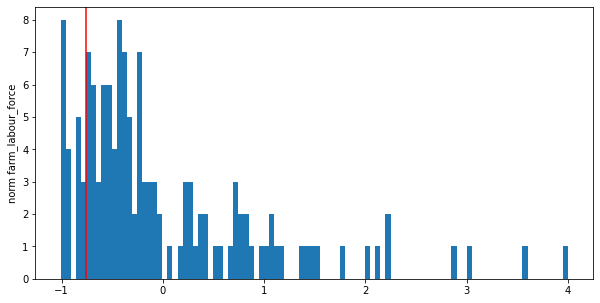

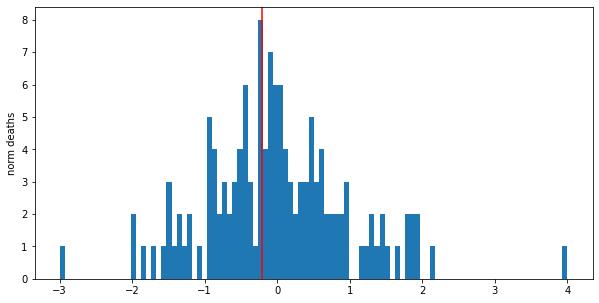

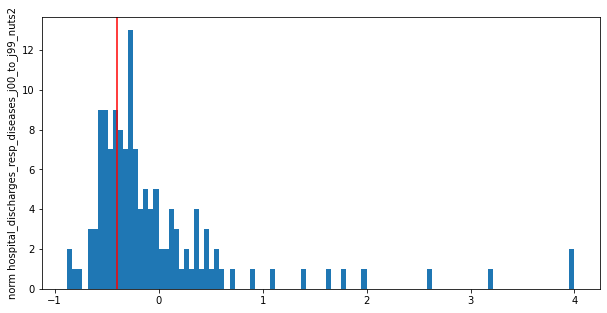

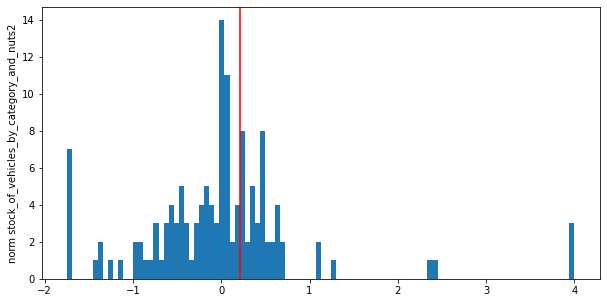

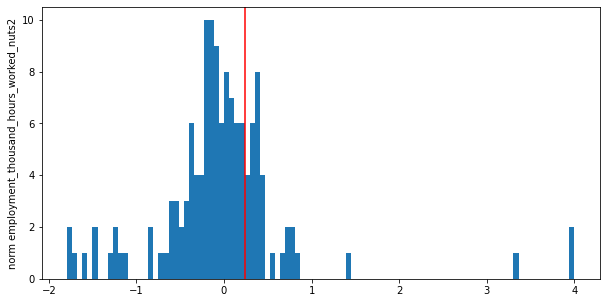

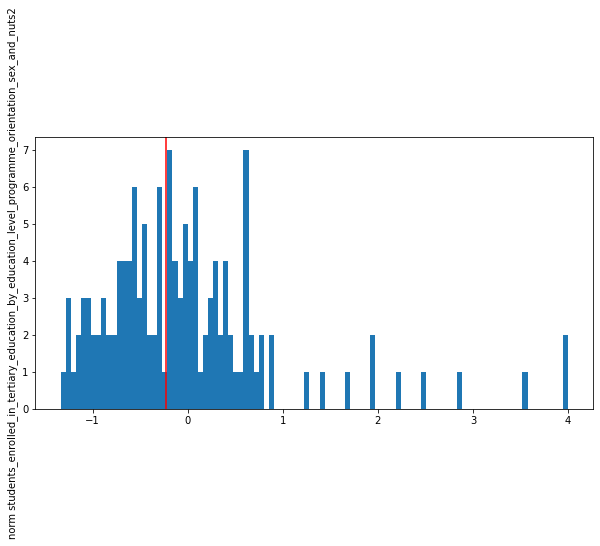

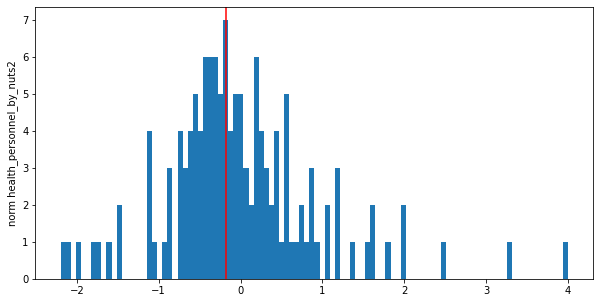

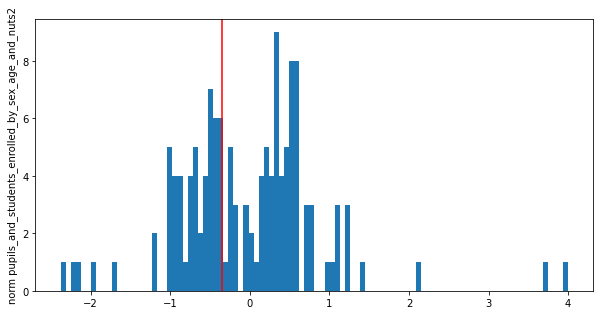

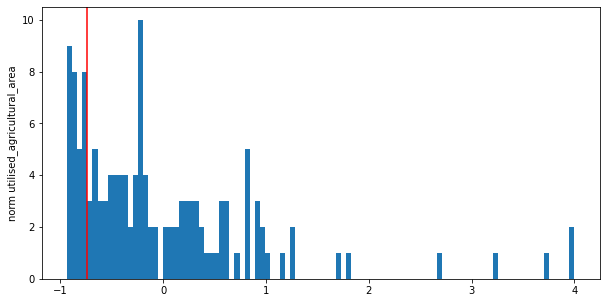

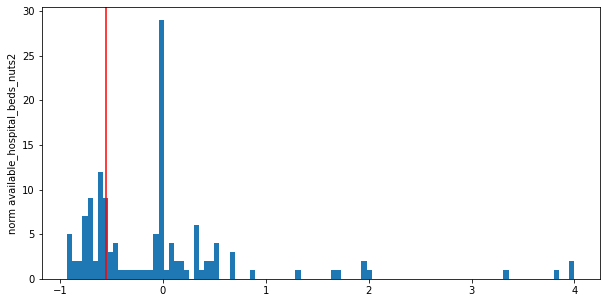

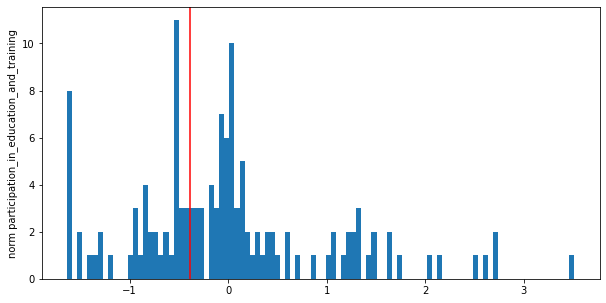

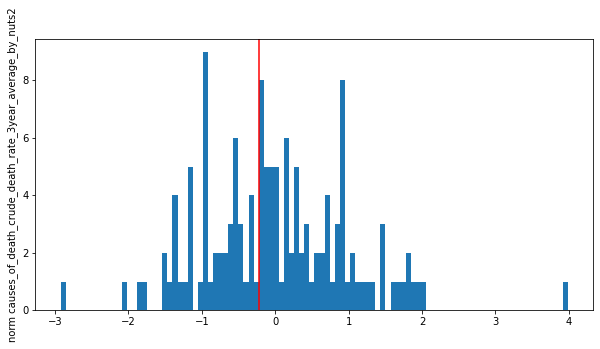

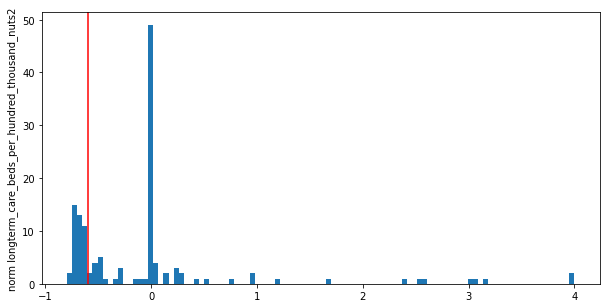

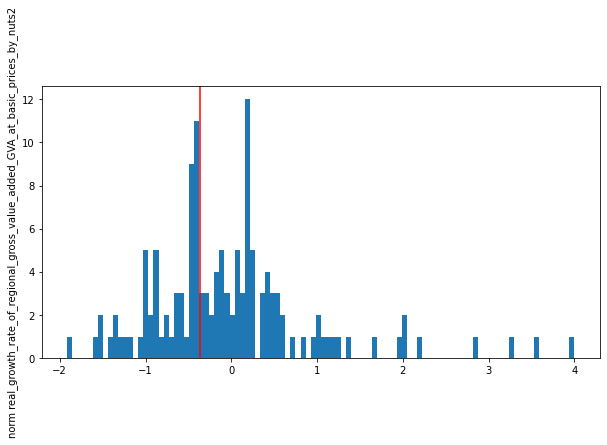

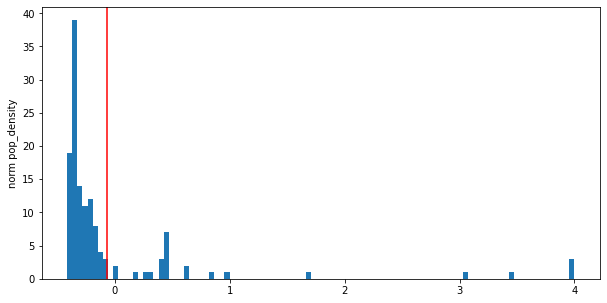

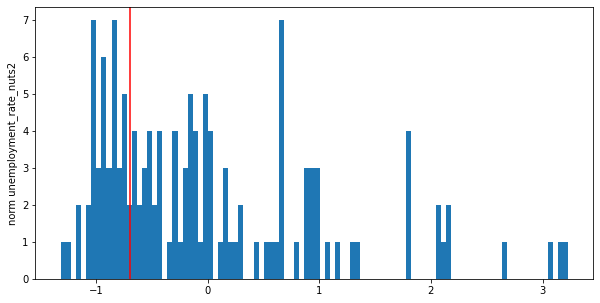

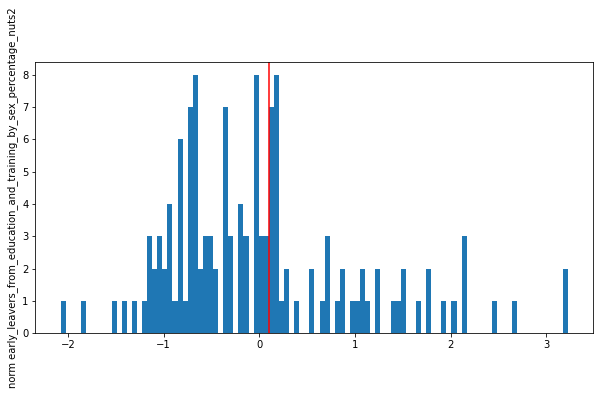

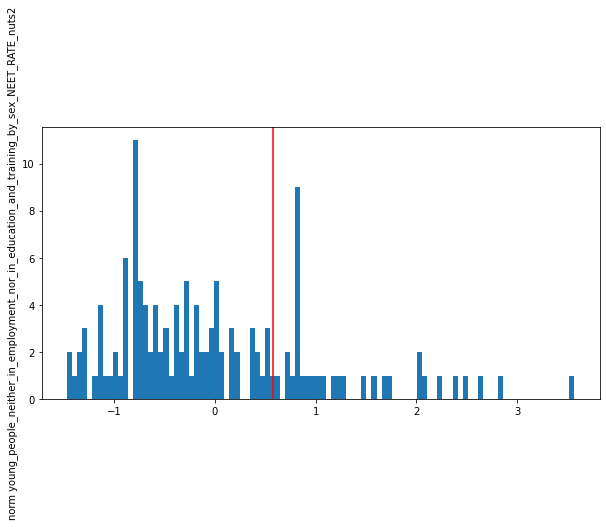

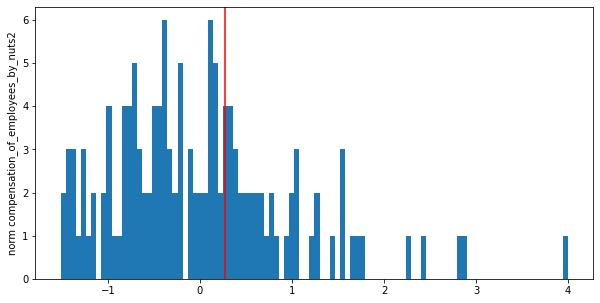

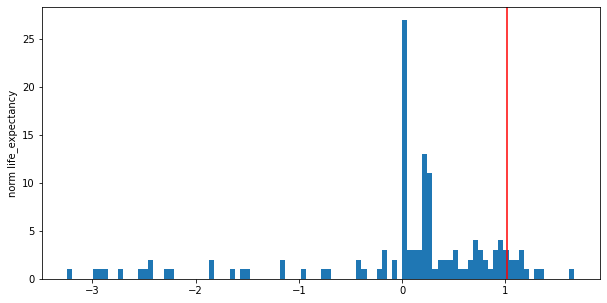

In [4]:
dm.df[dm.df.index == "FRY5"]

dm.df[dm.df.isna().sum(axis=1)/len(dm.df) > 0.10]

from analysis_lib.utils import plot_class_distribution, plot_sample_nans,\
plot_feature_nans, plot_clustering_quality,plot_clustering_subdivision, plot_lombardy_vs_all

figsize=(10,8)
plot_class_distribution(dm,figsize)
plot_sample_nans(dm,figsize)
plot_feature_nans(dm,figsize)
plot_clustering_quality(dm,figsize)
plot_clustering_subdivision(dm,figsize)
plot_lombardy_vs_all(dm,figsize)


100%|███████████████████████████████████████████| 20/20 [00:02<00:00,  7.01it/s]


saved violin plots to from_2020-08-20_to_2021-02-20__cumulativepositive__nclust_2_with_ML/results/violinplots
saved violin plots side by side to from_2020-08-20_to_2021-02-20__cumulativepositive__nclust_2_with_ML/results/violinplots_sidebyside


[1220/112523.173820:WARNING:vaapi_wrapper.cc(586)] VAAPI video acceleration not available for swiftshader
[1220/112523.173943:ERROR:gpu_init.cc(453)] Passthrough is not supported, GL is swiftshader, ANGLE is 
[1220/112523.288836:INFO:headless_shell.cc(653)] Written to file /tmp/tmpc7vyi0jg/temp.png.
[1220/112523.400566:WARNING:vaapi_wrapper.cc(586)] VAAPI video acceleration not available for swiftshader
[1220/112523.400650:ERROR:gpu_init.cc(453)] Passthrough is not supported, GL is swiftshader, ANGLE is 
[1220/112523.540031:INFO:headless_shell.cc(653)] Written to file /tmp/tmp6bfw8974/temp.png.


saved fscores to from_2020-08-20_to_2021-02-20__cumulativepositive__nclust_2_with_ML/results/fscores


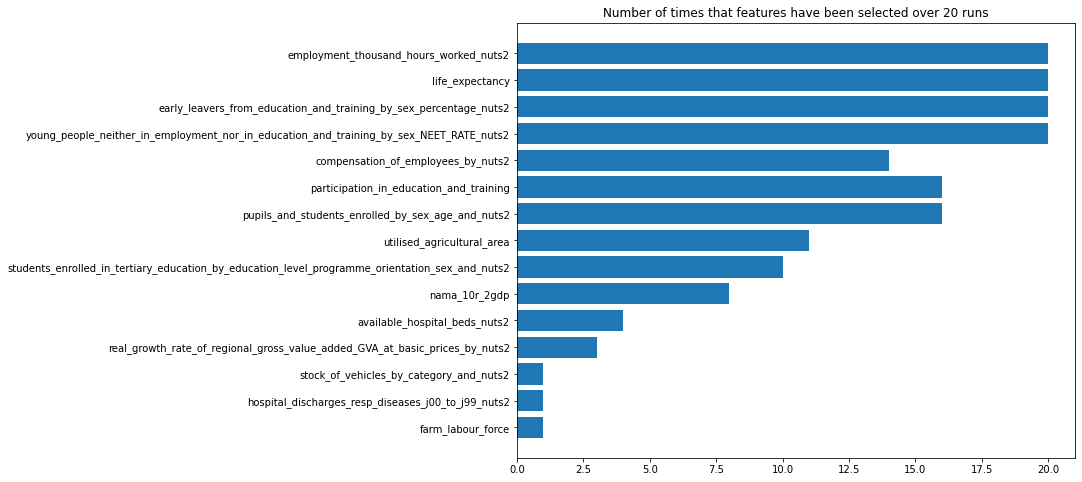

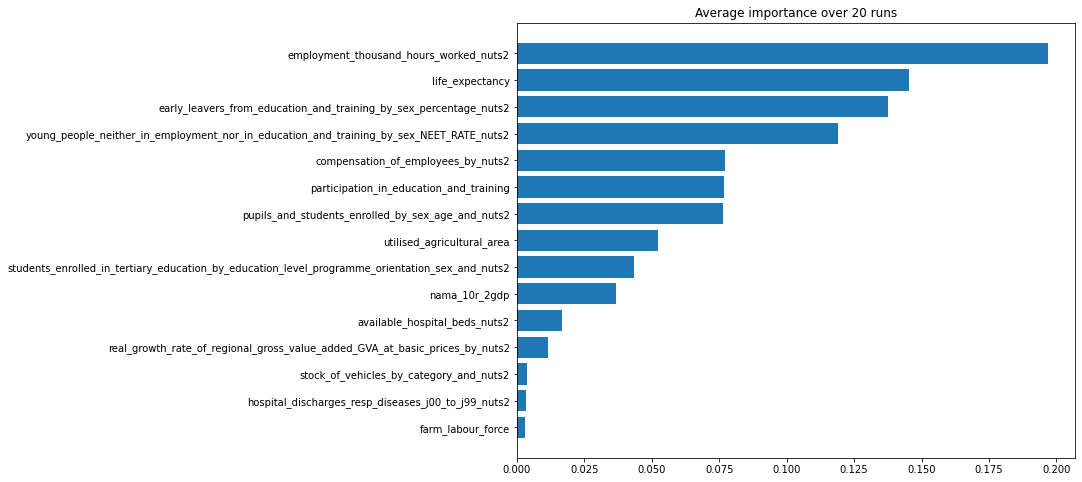

In [5]:
from analysis_lib.stats import StatsLogger


logger_path = os.path.join(dm.get_experiment_identifier(), "results")
logger = StatsLogger(logger_path)

logger.log_model_statistics(dm, 
                        None,
                         P_VAL_THRESHOLD=0.05,
                         N_RUNS=20,
                            k_smote = 6,)

## gridsearchcv with pipeline

In [5]:

class_weight_selection = [{'higher_than_avg':w, 'below_than_avg':1} \
                                             for w in [0.5, 1, 2, 4]]
class_weight_selection.append('balanced')

svm_param_grid = {'model__kernel':['linear'], 'model__C':[0.001, 0.1, 0.5, 1., 5., 10., 20, 50.],
                 'model__class_weight': class_weight_selection
                 }
rf_param_grid = {

    'model__criterion':['gini'],
 'model__max_features': ['sqrt'],

    'model__n_estimators': [100,400 ],
'model__max_depth': [4, 8, 16, 24, None],
    'model__min_samples_leaf': [1, 3, 5],
    'model__class_weight': class_weight_selection
 #'max_features': ['sqrt'],
 #'n_estimators': [100,200, 400],
    
#     'bootstrap': [True, False],
#     'min_samples_leaf': [1],
# 'min_samples_split': [2, 5, 10],            
    }
log_reg_param_grid = {
    'model__penalty':['l1','l2', 'elasticnet','liblinear', 'none'],
     'model__C':[0.001, 0.1, 0.5, 1., 5., 10., 20, 50.], #[0.001, 0.1, 0.5, 1., 3., 5., 8., 10.,20, 50.]
    'model__class_weight': class_weight_selection
}

class_weight='balanced'#{'higher_than_avg':2, 'below_than_avg':1}
model_names = ["random_forest", "svm", "logistic_regression"]
models_list = [RandomForestClassifier(), 
               SVC(),
               LogisticRegression()]
params_list = [rf_param_grid, svm_param_grid, log_reg_param_grid]




# loocv


In [6]:

results_list = []
scoring = {#"AUC": "roc_auc", 
           #"recall": recall,
          #'precision': precision,
          #'f1_macro':f1_macro,
          'misclf_err':misclf_error
            }

curr_scorer = f1_macro
for model_name, model, param_grid in zip(model_names, models_list,params_list):
    
    
    #if dm.prob_type == "regression":
    #        selector_helper = RandomForestRegressor()
    #else:
    #        selector_helper = RandomForestClassifier()
            
            
    pipeline = imb_pipeline.Pipeline( steps= [#('feature_selection', SelectFromModel(selector_helper )),
                                              ('sampling', SMOTE(k_neighbors=k_smote)),
                                          ("model",model)    ])    

    outer_cv = StratifiedKFold(n_splits=3)
    inner_cv = StratifiedKFold(n_splits=3)#LeaveOneOut()
    try:
        gs = GridSearchCV(pipeline, param_grid=param_grid, cv=inner_cv, 
                                          scoring=curr_scorer,
                                          n_jobs=-1)

        nested_score = cross_val_score(gs, X=X,y=y, cv=outer_cv, 
                                       scoring=curr_scorer,
                                      n_jobs=-1)
        #gs.fit(X, y)

        results_list.append({"model_name":model_name, "gs": gs, 'nested_score': nested_score})
    except Exception as err:
        print(err)

KeyboardInterrupt: 

# find best model

In [8]:
best_models_dict = dict()
for model_dict in results_list:
    model_dict['model_name']
    best_models_dict[model_dict['model_name']] = model_dict['gs'].best_estimator_
best_models_dict

{'random_forest': Pipeline(steps=[('feature_selection',
                  SelectFromModel(estimator=RandomForestClassifier())),
                 ('sampling', SMOTE(k_neighbors=6)),
                 ('model',
                  RandomForestClassifier(class_weight={'below_than_avg': 1,
                                                       'higher_than_avg': 10},
                                         max_depth=24, max_features='sqrt'))]),
 'svm': Pipeline(steps=[('feature_selection',
                  SelectFromModel(estimator=RandomForestClassifier())),
                 ('sampling', SMOTE(k_neighbors=6)),
                 ('model', SVC(C=20, class_weight='balanced', kernel='linear'))]),
 'logistic_regression': Pipeline(steps=[('feature_selection',
                  SelectFromModel(estimator=RandomForestClassifier())),
                 ('sampling', SMOTE(k_neighbors=6)),
                 ('model',
                  LogisticRegression(C=0.5,
                                     class_we

random_forest


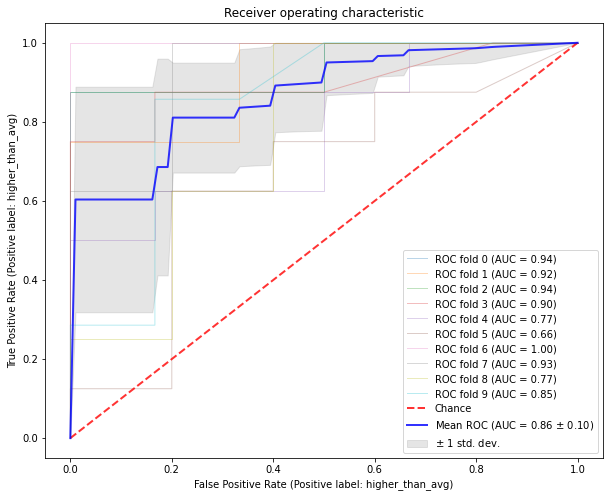

svm


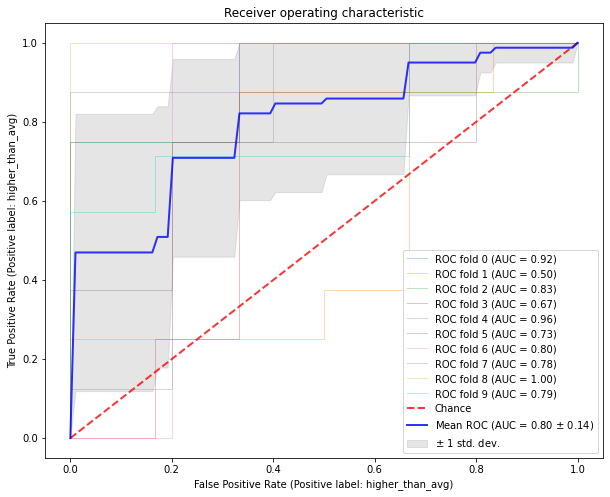

logistic_regression


/home/xrh1/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/xrh1/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/xrh1/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/xrh1/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/xrh1/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/xrh1/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarni

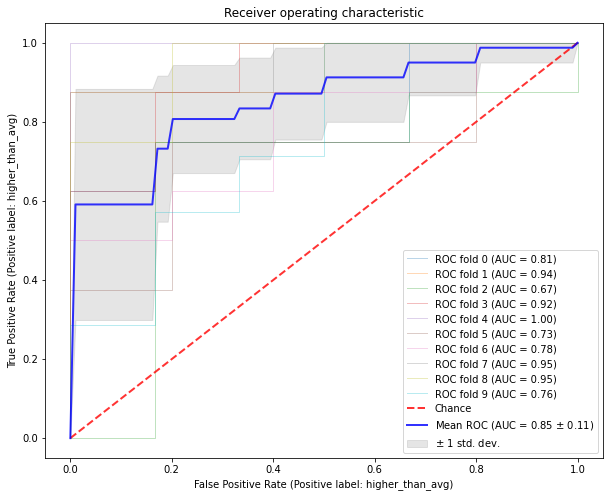

In [9]:


def plot_curve(tprs,aucs, mean_fpr, ax):
    
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic")
    ax.legend(loc="lower right")
    plt.show()




bestmodels_cv_results = []
bestmodels_roc_dict = dict()
for model_name, model in best_models_dict.items():

    fig, ax = plt.subplots(figsize=(10,8))
    tprs=[]
    aucs=[]
    mean_fpr = np.linspace(0, 1, 100)
    print(model_name)
    kfolds = StratifiedKFold(n_splits=10, shuffle=True)
    for fold, (train_index, test_index) in enumerate(kfolds.split(X, y)):

                X_train,y_train = X.iloc[train_index], y.iloc[train_index]
                X_test,y_test = X.iloc[test_index], y.iloc[test_index] 

                pipeline =  sklearn.base.clone(model)
                
              

                pipeline.fit(X_train, y_train)        
                score = curr_scorer(pipeline, X_test, y_test)
                
                
                
                
                viz = plot_roc_curve(pipeline, X_test, y_test,
                                     name='ROC fold {}'.format(fold),
                                     alpha=0.3, lw=1, ax=ax)
                interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
                interp_tpr[0] = 0.0
                tprs.append(interp_tpr)
                aucs.append(viz.roc_auc)    
                
                
                bestmodels_cv_results.append({"model_name":model_name, 
                                          "gs": pipeline, 
                                          "test_score":score, 
                                          "fold_idx":fold})
    plot_curve(tprs,aucs, mean_fpr, ax)
    bestmodels_roc_dict[model_name] = (fig,ax)


In [10]:
bestmodels_cv_results
best_cv_dict_of_lists = {k: [dic[k] for dic in bestmodels_cv_results] for k in bestmodels_cv_results[0]}

best_cv_df = pd.DataFrame(best_cv_dict_of_lists)

best_cv_df.groupby('model_name').mean()
res_df = pd.DataFrame( )
#res_df.reindex_like( best_cv_df.groupby('model_name').mean())
res_df['mean_test_score'] = best_cv_df.groupby('model_name').mean()['test_score']
res_df['std_test_score'] = best_cv_df.groupby('model_name').std()['test_score']


/home/xrh1/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/xrh1/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/xrh1/.local/lib/python3.8/site-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/home/xrh1/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/xrh1/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 439, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalt

/home/xrh1/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/xrh1/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/xrh1/.local/lib/python3.8/site-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/home/xrh1/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/xrh1/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 439, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalt

/home/xrh1/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/xrh1/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/xrh1/.local/lib/python3.8/site-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/home/xrh1/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/xrh1/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none

/home/xrh1/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/xrh1/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/xrh1/.local/lib/python3.8/site-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/home/xrh1/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/xrh1/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 439, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalt

/home/xrh1/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/xrh1/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/xrh1/.local/lib/python3.8/site-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/home/xrh1/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/xrh1/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 439, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalt

/home/xrh1/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/xrh1/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/xrh1/.local/lib/python3.8/site-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/home/xrh1/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/xrh1/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 439, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalt

/home/xrh1/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/xrh1/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/xrh1/.local/lib/python3.8/site-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/home/xrh1/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/xrh1/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 439, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalt

/home/xrh1/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/xrh1/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/xrh1/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/xrh1/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/xrh1/.local/lib/python3.8/site-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/home/xrh1/.local/lib/python3.8/site-packages/

life_expectancy   0.1754054463011282
early_leavers_from_education_and_training_by_sex_percentage_nuts2   0.14780112785601332
employment_thousand_hours_worked_nuts2   0.1426671326813328
compensation_of_employees_by_nuts2   0.11020062295398775
young_people_neither_in_employment_nor_in_education_and_training_by_sex_NEET_RATE_nuts2   0.0985355787070188
students_enrolled_in_tertiary_education_by_education_level_programme_orientation_sex_and_nuts2   0.09354433587783155
pupils_and_students_enrolled_by_sex_age_and_nuts2   0.0931523986312308
participation_in_education_and_training   0.07305904823522812
health_personnel_by_nuts2   0.06563430875622875


/home/xrh1/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


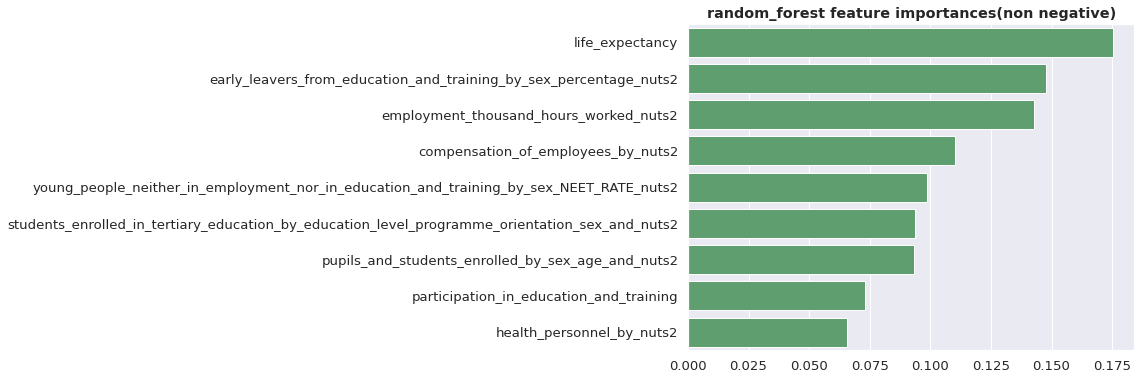

In [13]:

def get_optimal_model(results, sel_model_class='random_forest'):
    score = 0
    best_model = None
    for model_dict in results:
        if sel_model_class == model_dict['model_name']:
            if model_dict['test_score'] > score:
                score = model_dict['test_score']
                best_model = model_dict
    return best_model
best_model = get_optimal_model(bestmodels_cv_results, sel_model_class='random_forest')

selected_features = X.columns[best_model['gs']['feature_selection'].get_support()]

sorted_fimps = sorted(zip(selected_features, best_model['gs']['model'].feature_importances_), key=lambda x: x[1], reverse=True)

for feat_name, feat_imp in sorted_fimps:
    print(feat_name, " ", feat_imp)
    
import seaborn as sns
sns.set(font_scale=1.2)
plt.figure(figsize=(8,6))
colors = ['g' if val >= 0 else 'r' for name, val in sorted_fimps]
b = sns.barplot([x[1] for x in sorted_fimps], [x[0] for x in sorted_fimps], palette=colors)
b.set_title(best_model['model_name'] + ' feature importances(non negative)', weight='bold')
#b.set_xlabel("Y Label",fontsize=30)
#b.set_yticklabels(b.get_yticklabels(), size = 15)
plt.show()

employment_thousand_hours_worked_nuts2   2.8399940999319115
life_expectancy   1.1807047420276007
students_enrolled_in_tertiary_education_by_education_level_programme_orientation_sex_and_nuts2   0.5071266019125136
available_hospital_beds_nuts2   0.22432267525394098
participation_in_education_and_training   -0.14813060358014454
utilised_agricultural_area   -0.20063249778838113
early_leavers_from_education_and_training_by_sex_percentage_nuts2   -0.4194164460874117
young_people_neither_in_employment_nor_in_education_and_training_by_sex_NEET_RATE_nuts2   -0.44334807191368275
compensation_of_employees_by_nuts2   -1.8237333075621018


/home/xrh1/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


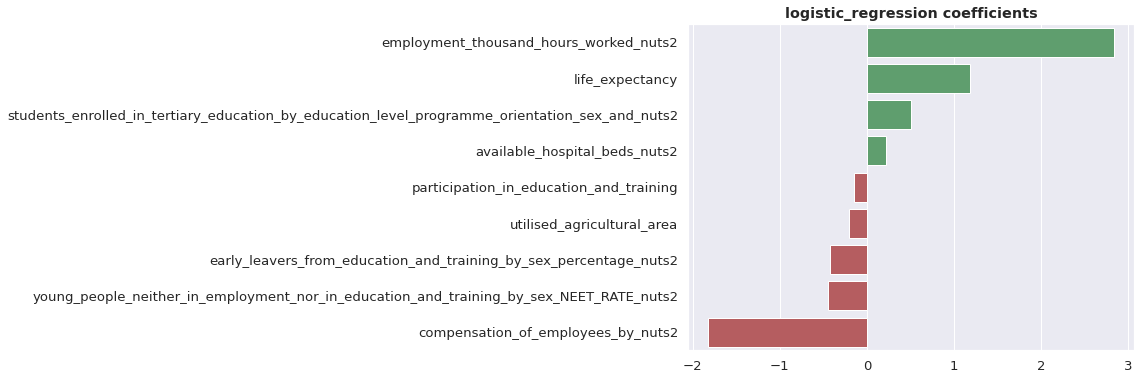

In [14]:
best_model = get_optimal_model(bestmodels_cv_results, sel_model_class='logistic_regression')

selected_features = X.columns[best_model['gs']['feature_selection'].get_support()]


sorted_fimps = sorted(zip(selected_features.tolist(), best_model['gs']['model'].coef_.flatten().tolist()), key=lambda x: x[1], reverse=True)

for feat_name, feat_imp in sorted_fimps:
    print(feat_name, " ", feat_imp)
    
import seaborn as sns
sns.set(font_scale=1.2)
plt.figure(figsize=(8,6))
colors = ['g' if val >= 0 else 'r' for name, val in sorted_fimps]
b = sns.barplot([x[1] for x in sorted_fimps], [x[0] for x in sorted_fimps], palette=colors)
b.set_title(best_model['model_name'] + ' coefficients', weight='bold')
#b.set_xlabel("Y Label",fontsize=30)
#b.set_yticklabels(b.get_yticklabels(), size = 15)
plt.show()

nama_10r_2gdp   1.6988924674236483
employment_thousand_hours_worked_nuts2   1.4676319851041404
students_enrolled_in_tertiary_education_by_education_level_programme_orientation_sex_and_nuts2   0.5857372496793151
life_expectancy   0.42779485750967683
utilised_agricultural_area   0.07209745893798261
participation_in_education_and_training   -0.19708431960428863
early_leavers_from_education_and_training_by_sex_percentage_nuts2   -0.27779554402541806
pupils_and_students_enrolled_by_sex_age_and_nuts2   -0.37748044689331667
young_people_neither_in_employment_nor_in_education_and_training_by_sex_NEET_RATE_nuts2   -0.5037769104146542
compensation_of_employees_by_nuts2   -2.5470557139935073


/home/xrh1/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


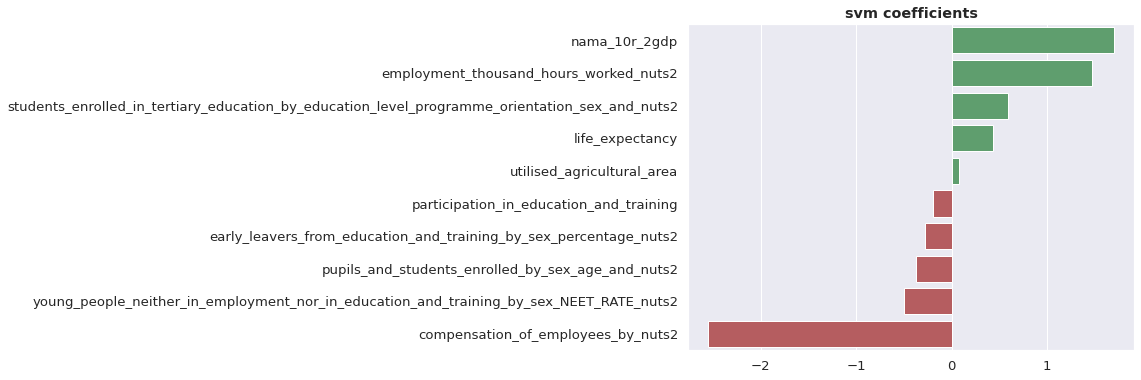

In [15]:
best_model = get_optimal_model(bestmodels_cv_results, sel_model_class='svm')

selected_features = X.columns[best_model['gs']['feature_selection'].get_support()]


sorted_fimps = sorted(zip(selected_features.tolist(), best_model['gs']['model'].coef_.flatten().tolist()), key=lambda x: x[1], reverse=True)

for feat_name, feat_imp in sorted_fimps:
    print(feat_name, " ", feat_imp)
    
import seaborn as sns
sns.set(font_scale=1.2)
plt.figure(figsize=(8,6))


colors = ['g' if val >= 0 else 'r' for name, val in sorted_fimps]
b = sns.barplot([x[1] for x in sorted_fimps], [x[0] for x in sorted_fimps], palette=colors)
b.set_title(best_model['model_name'] + ' coefficients', weight='bold')
#b.set_xlabel("Y Label",fontsize=30)
#b.set_yticklabels(b.get_yticklabels(), size = 15)
plt.show()

In [10]:
from analysis_lib.stats import get_files
import os


experiment_data_dict = logger.get_experiment_stats(results_list)
print(experiment_data_dict['model_name'])
print(experiment_data_dict['cfg'])
print(experiment_data_dict['val_metric'])




random_forest
mean_val_score                                                    0.822
std_val_score                                                     0.382
rank_val_score                                                        1
model__class_weight        {'higher_than_avg': 10, 'below_than_avg': 1}
model__criterion                                                   gini
model__max_depth                                                 16.000
model__max_features                                                sqrt
model__min_samples_leaf                                               1
model__n_estimators                                                 400
Name: 253, dtype: object
0.8222222222222222


Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier())),
                ('sampling', SMOTE(k_neighbors=6)),
                ('model',
                 RandomForestClassifier(class_weight={'below_than_avg': 1,
                                                      'higher_than_avg': 2},
                                        max_depth=8, max_features='sqrt',
                                        n_estimators=400))])
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier())),
                ('sampling', SMOTE(k_neighbors=6)),
                ('model', SVC(class_weight='balanced', kernel='linear'))])
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier())),
                ('sampling', SMOTE(k_neighbors=6)),
                ('model',
                 LogisticRegression(C=50.0,
                                    class_weight={'below_th

In [19]:
best_configurations = []
for model_name , stats_df in experiment_data_dict['stats_dataframes'].items():
  
    best_model_row = stats_df[stats_df['mean_val_score'] == stats_df['mean_val_score'].max() ]
    
    hyperparam_names = best_model_row.keys().tolist()[3:]
    print(model_name)
    print(best_model_row)
    hyperparam_set = {  hp_name: best_model_row[hp_name].values.item()  for hp_name in hyperparam_names  } 
    
    best_configurations.append({"model_name": model_name, 
     'params': hyperparam_set,
     'mean_val_score':best_model_row['mean_val_score'].values.item(),
     'std_val_score': best_model_row['std_val_score'].values.item()
    })
    
model_map = {'svm': SVC(),
            'random_forest': RandomForestClassifier(),
            'logistic_regression': LogisticRegression()}

svm
    mean_val_score  std_val_score  rank_val_score  model__C  \
39           0.763          0.425               1     1.000   

   model__class_weight model__kernel  
39            balanced        linear  
logistic_regression
     mean_val_score  std_val_score  rank_val_score  model__C  \
366           0.807          0.394               1    50.000   

                             model__class_weight model__penalty  
366  {'higher_than_avg': 1, 'below_than_avg': 1}             l2  
random_forest
     mean_val_score  std_val_score  rank_val_score  \
127           0.822          0.382               1   
253           0.822          0.382               1   

                              model__class_weight model__criterion  \
127   {'higher_than_avg': 2, 'below_than_avg': 1}             gini   
253  {'higher_than_avg': 10, 'below_than_avg': 1}             gini   

     model__max_depth model__max_features  model__min_samples_leaf  \
127             8.000                sqrt           

ValueError: can only convert an array of size 1 to a Python scalar

In [ ]:
bestmodels_cv_results = []
for model_cfg in best_configurations:
    params = model_cfg['params']
    
    kfolds = StratifiedKFold(n_splits=10, shuffle=True)
    for fold, (train_index, test_index) in enumerate(kfolds.split(X, y)):

                X_train,y_train = X.iloc[train_index], y.iloc[train_index]
                X_test,y_test = X.iloc[test_index], y.iloc[test_index] 

                if dm.prob_type == "regression":
                        selector_helper = RandomForestRegressor()
                else:
                        selector_helper = RandomForestClassifier()

                
                model = model_map[model_cfg['model_name']]
                pipeline = imb_pipeline.Pipeline( steps= [('feature_selection', SelectFromModel(selector_helper )),
                                                          ('sampling', SMOTE(k_neighbors=k_smote)),
                                                      ("model",model)    
                                                         ])
                param_grid = { k:[v] for k,v in params.items()  }
                # this random forest parameter gets wrongly changed in pandas from None to np.nan
                # thus when going bck to the original parameter, it is necessary to set it back to None
                if 'model__max_depth' in param_grid and np.isnan(param_grid['model__max_depth'][0]) : 
                    param_grid['model__max_depth'] = [None]
                #print(param_grid)
                gs = GridSearchCV(pipeline, param_grid=param_grid, 
                                  cv=LeaveOneOut(), #
                                              scoring=f1_macro,
                                  n_jobs=-1)

                gs.fit(X_train, y_train)        
                score = f1_macro(gs, X_test, y_test)

                bestmodels_cv_results.append({"model_name":model_cfg['model_name'], 
                                          "gs": gs, 
                                          "test_f1_macro":score, 
                                          "fold_idx":fold})

In [ ]:

v = {k: [dic[k] for dic in bestmodels_cv_results] for k in bestmodels_cv_results[0]}
best_models_cv_results_df = pd.DataFrame(v)
best_models_cv_results_df['val_score'] = best_models_cv_results_df['gs'].apply(lambda x: x.best_score_)

model_mean_test_scores = best_models_cv_results_df.groupby("model_name").mean("test_f1_macro" )['test_f1_macro'].to_dict()
model_std_test_scores = best_models_cv_results_df.groupby("model_name").std( )['test_f1_macro'].to_dict()

model_mean_val_scores = best_models_cv_results_df.groupby("model_name").mean("val_score" )['val_score'].to_dict()
model_std_val_scores = best_models_cv_results_df.groupby("model_name").std( )['val_score'].to_dict()

max_val_scores =  best_models_cv_results_df.groupby("model_name").max('val_score')['val_score'].to_dict()
max_test_scores =  best_models_cv_results_df.groupby("model_name").max('test_f1_macro')['test_f1_macro'].to_dict()


stats_dict = dict()
for k in model_mean_test_scores.keys():
    

    
    res = best_models_cv_results_df[(best_models_cv_results_df['model_name'] == k) \
                              & (max_val_scores[k] == best_models_cv_results_df['val_score'])]
    res = res.iloc[0]

    
    
    
    if k not in stats_dict:
        stats_dict[k] = {}
    stats_dict[k]['fit_estimator'] = res['gs'].best_estimator_  
    stats_dict[k]['curr_val_score'] = res['val_score']
    stats_dict[k]['curr_test_score'] = res['test_f1_macro']
        
        
    stats_dict[k]['mean_test_score'] = model_mean_test_scores[k]
    stats_dict[k]['std_test_score'] = model_std_test_scores[k]
    
    stats_dict[k]['mean_val_score'] = model_mean_val_scores[k]
    stats_dict[k]['std_val_score'] = model_std_val_scores[k]
    
    stats_dict[k]['max_val_score'] = max_val_scores[k]
    stats_dict[k]['max_test_score'] = max_test_scores[k]
    
    
    


In [ ]:
best_rf = stats_dict['random_forest']['fit_estimator']
best_logreg = stats_dict['logistic_regression']['fit_estimator']
best_svm = stats_dict['svm']['fit_estimator']

In [121]:

log_reg = stats_dict['logistic_regression']['fit_estimator']["model"]

for coef, name in zip(log_reg.coef_.flatten(), X.columns[stats_dict['logistic_regression']['fit_estimator']["feature_selection"].get_support()]):
    print(name, " ", coef)


nama_10r_2gdp   3.446415629684175
farm_labour_force   -0.9942213880946735
stock_of_vehicles_by_category_and_nuts2   -0.5893053826721819
employment_thousand_hours_worked_nuts2   2.1535900178155187
available_hospital_beds_nuts2   0.7670635057342187
pop_density   1.3693390388425104
unemployment_rate_nuts2   0.07178872982919259
compensation_of_employees_by_nuts2   -3.710744537308804
life_expectancy   7.2145636839433305


In [123]:
best_svm

Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier())),
                ('sampling', SMOTE(k_neighbors=6)), ('model', SVC(C=5.0))])

In [ ]:


        
def get_cm_and_roc(dm, model, X_valid, y_valid, cv_index, ax=None)
        #store roc curve data
        assert dm.prob_type == "classification" and (dm.clf_type =="binary" or dm.clf_type=="extremes" or dm.n_clusters==2),\
                                "Error: expected classification problem of type {binary, extremes} and n_clusters==2 but found:\n\t"
                        + "prob_type == dm.prob_type\n\t clf_type == dm.clf_type\n\t n_clusters == dm.n_clusters==2\n"
        #tprs = []
        #aucs = []
        mean_fpr = np.linspace(0, 1, 100)

        
        if ax is None:
            fig, ax = plt.subplots(figsize=(10,8))
        
        viz = plot_roc_curve(model, X_valid, y_valid,
                                 name='ROC fold {}'.format(cv_index),
                                 alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0

        return interp_tpr, viz.roc_auc

 

In [ ]:


figsize=(10,8)
plot_class_distribution(training_manager,figsize)
plot_sample_nans(training_manager,figsize)
plot_feature_nans(training_manager,figsize)
plot_clustering_quality(training_manager,figsize)
plot_clustering_subdivision(training_manager,figsize)
plot_lombardy_vs_all(training_manager,figsize)

air_passengers   0.21232876712328766
available_hospital_beds_nuts2   0.21232876712328766
causes_of_death_crude_death_rate_3year_average_by_nuts2   0.13013698630136986
compensation_of_employees_by_nuts2   0.13013698630136986
deaths   0.02054794520547945
early_leavers_from_education_and_training_by_sex_percentage_nuts2   0.1780821917808219
employment_thousand_hours_worked_nuts2   0.11643835616438356
farm_labour_force   0.0136986301369863
health_personnel_by_nuts2   0.1780821917808219
hospital_discharges_resp_diseases_j00_to_j99_nuts2   0.22602739726027396
life_expectancy   0.273972602739726
longterm_care_beds_per_hundred_thousand_nuts2   0.3698630136986301
nama_10r_2gdp   0.13013698630136986
participation_in_education_and_training   0.1506849315068493
pop_density   0.13013698630136986
population_nuts2   0.02054794520547945
pupils_and_students_enrolled_by_sex_age_and_nuts2   0.13013698630136986
real_growth_rate_of_regional_gross_value_added_GVA_at_basic_prices_by_nuts2   0.130136986301369

(0.0, 1.0)

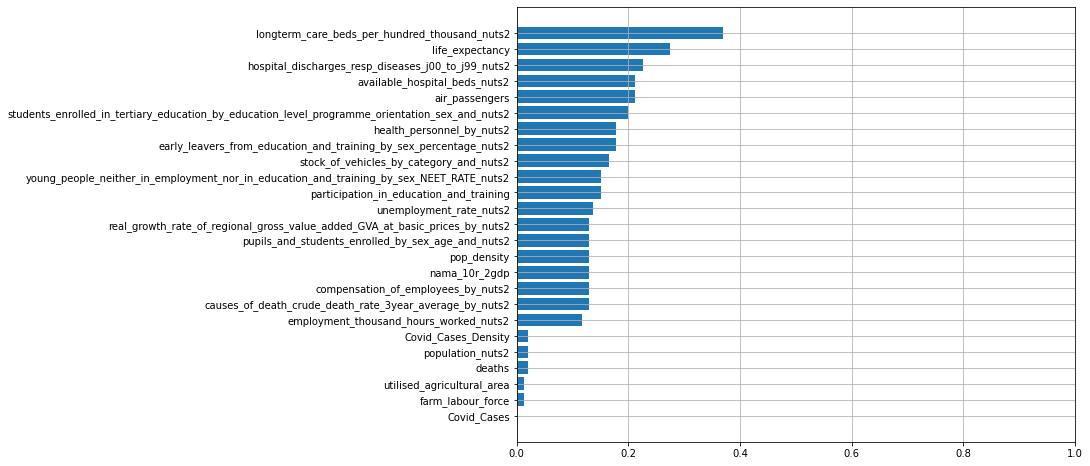

In [6]:
values  = []
labels = []
labels_dict = dict()
for col in training_manager.df.columns:
    print(col, " ", len(training_manager.df[training_manager.df[col].isna()]) / len(training_manager.df[col]))
    values.append(len(training_manager.df[training_manager.df[col].isna()]) / len(training_manager.df[col]))
    value = len(training_manager.df[training_manager.df[col].isna()]) / len(training_manager.df[col])
    labels.append(col)
    labels_dict[col] = value
new_dict = {k:v for k,v in sorted(labels_dict.items(), key=lambda x: x[1])}
print(new_dict)
plt.figure(figsize=(10,8))
plt.barh(list(new_dict.keys()), list(new_dict.values()) )
plt.grid()
plt.xlim(0,1)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import mean_squared_error, ConfusionMatrixDisplay, confusion_matrix,\
    mean_absolute_error,plot_roc_curve, r2_score, f1_score, \
    accuracy_score,auc, roc_auc_score, roc_curve, RocCurveDisplay,\
    recall_score
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import dataframe_image as dfi
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

# note: this has been suppressed after testing that pandas achieves the desired behavior
# it is documented online that such warning can wrongly appear sometimes, and this is the case
pd.options.mode.chained_assignment = None



        
class StatsLogger:
    def __init__(self, dest_dir_path):
        if not os.path.exists(dest_dir_path):
            os.makedirs(dest_dir_path)
            
        self.dest_dir_path = dest_dir_path
        
    
    def log_model_statistics(self, datamanager, 
                        model_init_fn,
                         P_VAL_THRESHOLD=0.05,
                         N_RUNS=20,
                            k_smote = 6,):
        from analysis_lib.utils import eval_robustness
        def model_init():
            return RandomForestClassifier(criterion='gini',
                                                       max_depth=None,
                                                        max_features='sqrt',
                                                        min_samples_leaf=1,
                                                        n_estimators=100) 
        if model_init_fn is None:
            model_init_fn = model_init
 
        f_importances = eval_robustness(datamanager,
                           model_init_fn,
                        N_RUNS=N_RUNS,
                            k_smote = k_smote,
                            DEST_DIR = self.dest_dir_path,
                           figsize=(10,8))
    
        features = []
        importances = []
        n_selected_list = []
        for item in f_importances.items():
            feature, (fimp, n_selected) = item
            features.append(feature)
            importances.append(fimp)
            n_selected_list.append(n_selected)

            
        feature_importance_dataset_file_path = os.path.join(self.dest_dir_path,f"feature_importance_from_{datamanager.start_date}_to_{datamanager.end_date}.csv")
        pd.DataFrame( {"feature name": features,
                          "avg importance": importances,
                          "number of selections": n_selected_list} ).set_index("feature name")\
        .to_csv(feature_importance_dataset_file_path)
        
        

        
        per100k_dataset_path = datamanager.get_data_paths()["per100k_dataset"]
        
        violinplots_path = os.path.join(self.dest_dir_path, "violinplots")
        violinplots_sidebyside_path = os.path.join(self.dest_dir_path, "violinplots_sidebyside")
        fscores_path = os.path.join(self.dest_dir_path, "fscores")
        
        save_per_feature_distrib(per100k_dataset_path, dest_dir_path=violinplots_path)
        get_side_by_side_plots(per100k_dataset_path, dest_dir_path=violinplots_sidebyside_path)
        f_test_features(per100k_dataset_path, feature_importance_dataset_file_path, THRESHOLD=P_VAL_THRESHOLD, 
                        dest_dir_path=fscores_path)    
            
    def get_experiment_stats(self, results_list):
        return get_experiment_stats(results_list, "models" , self.dest_dir_path)

            
            

def get_gridsearch_json(results_list):
    info_dict = dict()
    for dictionary in results_list:
        model_name = dictionary['model_name']
        cv_dict = dictionary['gs'].cv_results_
        updated_cv_dict = get_update( cv_dict)
        info_dict[model_name] = updated_cv_dict
    return info_dict
        
def get_update(dictionary):
    new_dict = dict()
    new_dict['params'] = dictionary['params']
    new_dict['mean_val_score'] = dictionary['mean_test_score'].tolist()
    new_dict['std_val_score'] = dictionary['std_test_score'].tolist()
    new_dict['rank_val_score'] = dictionary['rank_test_score'].tolist()
    return new_dict


def parse_gridsearch_to_csv(results_list, model_dir, dest_dir_path="./"):
    data = get_gridsearch_json(results_list)

    models_dict = dict()
    for model_name, model_cv_data in data.items():

        column_wise_data = dict()
        models_dict[model_name] = column_wise_data


        params = model_cv_data["params"]
        mean_test_scores = model_cv_data["mean_val_score"]
        std_test_scores = model_cv_data["std_val_score"]
        rank_test_scores = model_cv_data["rank_val_score"]

        column_wise_data["mean_val_score"] = model_cv_data["mean_val_score"]
        column_wise_data["std_val_score"] = model_cv_data["std_val_score"]
        column_wise_data["rank_val_score"] = model_cv_data["rank_val_score"]
    

        for param_set in params:
            for k,v in param_set.items():
                if k not in column_wise_data:
                    column_wise_data[k] = []

                column_wise_data[k].append(v)

    dir_path = os.path.join(dest_dir_path, model_dir)
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

    for model_name,  model_cv_data in models_dict.items():
        df = pd.DataFrame(model_cv_data)
        results_path = os.path.join(dir_path, model_name + ".csv")

        df.to_csv(results_path)
        



def get_files(dirpath):
    l = dict()
    for filename in os.listdir(dirpath):
        
        filepath = os.path.join(dirpath, filename)
        df = pd.read_csv(filepath, index_col=0)
        
        pos = filename.rindex(".")
        name = filename[:pos]
        l[name] = df
    return l


def get_best_model(wave_dirpath):
    dataframes_dict = get_files(wave_dirpath)
    l = []
    for model_name, df in dataframes_dict.items():
        best_config = df.sort_values("rank_val_score").iloc[0]  
        l.append( (model_name,best_config))    
        
    best_model_name = None
    best_model = None
    score = 0
    for model_name, best_config in l:
        if best_config["mean_val_score"] >= score:
            best_model_name = model_name
            score = best_config["mean_val_score"]
            best_model = best_config
        
    return best_model_name, best_model, score


def get_experiment_stats(gs_results_list, model_dir, dest_dir_path="./"):
    parse_gridsearch_to_csv(gs_results_list, model_dir, dest_dir_path=dest_dir_path)
    
    path = os.path.join(dest_dir_path, model_dir)
  
    model_name, model_cfg, metric = get_best_model(path)
    model_dataframes = get_files(path)
    
    
    return {'model_name':model_name, 
            'cfg':model_cfg, 
            'val_metric':metric,
           'stats_dataframes':model_dataframes}

            
            
            
            
            
            

def save_per_feature_distrib(dataset_file_path, dest_dir_path="./violinplots"):
    if not os.path.exists(dest_dir_path):
        os.makedirs(dest_dir_path)
    df = pd.read_csv(dataset_file_path)\
            .set_index("NUTS")
    #.drop(index=["FI20","ES64", "FRY5", "MT00", "LU00","ES63","BG32", "BG42"
    #                                          ])

    # FRY5 removed for anomalous number of vehicles per 100k abh, (600k, all others are below 200k)
    # FRY5 removed for anomalous utilised agricultural area 585005 while all others are below 200k
    # FI20 removed for anomalous number of hospital discharges (106,858 when all other regions are below 20k)
    # ES64 removed fro anomalous number of hospital discharges (over 50k  while all other regions are lower than 10k)
    # ES64 AND FI20 removed for anomalous number of health personnel 13650 and 29570 respectively (all other regions are below 5k)


    # ES63 removed for anomalous number of air passengers (around 20k when all others are below 10k)
    # MALTA AND LUXEMBOURG REMOVED FOR ANOMALOUS NUMBER OF HOURS WORKED per 100k
    # (LU00   250,456.747)
    # (MT00   304,749.211)
    # BG32,BG42 anomalous number of longterm care beds > 3000 per100k while all others are below that threshold
    #BG32   5,128.060
    #BG42   6,320.290

    population_dependent_features = [
                    "air_passengers",
                    "nama_10r_2gdp",
                    "farm_labour_force",
                    "deaths",
                    "hospital_discharges_resp_diseases_j00_to_j99_nuts2",
                    "stock_of_vehicles_by_category_and_nuts2",
                    "employment_thousand_hours_worked_nuts2",
                    "students_enrolled_in_tertiary_education_by_education_level_programme_orientation_sex_and_nuts2",
                    "health_personnel_by_nuts2",
                    "pupils_and_students_enrolled_by_sex_age_and_nuts2",
                      "utilised_agricultural_area",]


    TRUE_CLASS = "covid_severity"
    classes =  df[TRUE_CLASS].unique()


    columns_to_drop = ["covid_severity","covid_density_by100k", "Covid_Cases"]
    df_reduced = df.drop(columns=columns_to_drop)


    for column in df_reduced.columns:

        #print(column)
        groups_dict = dict()
        labels_pos = dict()
        groups_labels = []
        groups_data = []
        group_mapper = dict()

        i = 0
        for class_ in classes:
            groups_dict[column] = df[df[TRUE_CLASS] == class_ ][column].values

            groups_labels.append(class_)
            groups_data.append(df[df[TRUE_CLASS] == class_ ][column].values)

            group_mapper[class_] = df[df[TRUE_CLASS] == class_ ][column].values

            labels_pos[class_] = i
            i += 1

     
        plt.figure(figsize=(10,8))
       

        addition = column
        if column in population_dependent_features:
            addition = column + " per 100k inhabitants"
        plt.title(addition)

        order_mapping_binary = {"below_than_avg":0, "higher_than_avg":1}
        order_mapping_multi = {"low":0, "medium":1, "high":2}
        order_mapping_extremes = {"low":0,  "high":1}
        mapper = { "binary": order_mapping_binary,
                  "multi":order_mapping_multi,
                  "extremes":order_mapping_extremes}

        current_mapper = mapper["binary"]

        sorted_mapper = dict(sorted(group_mapper.items(), key=lambda x: current_mapper[x[0]] ))


        data = list(sorted_mapper.values())
        positions = [pos+1 for pos in range(len(sorted_mapper.keys()))]


        ax = plt.subplot(111)

        plt.violinplot(data, positions)

        ax.set_xticks(positions)
        ax.set_xticklabels(sorted_mapper.keys())

        value = df[df.index == "ITC4" ][column].values.tolist()[0]
      
        dot, = plt.plot(2,
                value, c='r', marker="o")
        plt.legend( [dot], ["lombardy"] )

        plt.savefig(os.path.join(dest_dir_path ,column) )
        
        plt.close()
        
    print(f"saved violin plots to {dest_dir_path}")
def get_side_by_side_plots(dataset_file_path, dest_dir_path="./violinplots_sidebyside"):
    if not os.path.exists(dest_dir_path):
        os.makedirs(dest_dir_path)
    df = pd.read_csv(dataset_file_path)\
            .set_index("NUTS")


    population_dependent_features = [
                    "air_passengers",
                    "nama_10r_2gdp",
                    "farm_labour_force",
                    "deaths",
                    "hospital_discharges_resp_diseases_j00_to_j99_nuts2",
                    "stock_of_vehicles_by_category_and_nuts2",
                    "employment_thousand_hours_worked_nuts2",
                    "students_enrolled_in_tertiary_education_by_education_level_programme_orientation_sex_and_nuts2",
                    "health_personnel_by_nuts2",
                    "pupils_and_students_enrolled_by_sex_age_and_nuts2",
                      "utilised_agricultural_area",]


    TRUE_CLASS = "covid_severity"
    classes =  df[TRUE_CLASS].unique()


    columns_to_drop = ["covid_severity","covid_density_by100k", "Covid_Cases"]
    df_reduced = df.drop(columns=columns_to_drop)
    
    analysis_df = df[df_reduced.columns.tolist()+ [TRUE_CLASS] ]
    analysis_df["representation"] = pd.Series( ["" for _ in range(len(analysis_df))], index=analysis_df.index)
    
    
    for column in df_reduced.columns:
        plt.figure(figsize=(10,7))
        addition = column
        if column in population_dependent_features:
            addition = column + " per 100k inhabitants"
        plt.title(addition)

        sns.violinplot(x="representation", y=column, data=analysis_df,hue=TRUE_CLASS,
                       hue_order=["below_than_avg", "higher_than_avg"], palette="muted",
                       cut=0,split=True)
        value = df[df.index == "ITC4" ][column].values.tolist()[0]
        
        dot, = plt.plot(0,
                value, c='r', marker="o")
        plt.legend( [dot], ["lombardy"] )
        plt.savefig(os.path.join(dest_dir_path ,column) )
        plt.close()
    print(f"saved violin plots side by side to {dest_dir_path}")


def f_test_features(dataset_path, feature_importance_dataset, THRESHOLD=0.05, dest_dir_path="./fscores"):
    pd.options.display.float_format = '{:,.3f}'.format

    if not os.path.exists(dest_dir_path):
            os.makedirs(dest_dir_path)
    df = pd.read_csv(dataset_path)\
                .set_index("NUTS")

    columns_to_drop = ["covid_severity","covid_density_by100k", "Covid_Cases"]

    X = df[df.drop(columns=columns_to_drop).columns]
    y = df["covid_severity"]
    fstat, pvalue = f_classif(X,y)



    importances_df = pd.read_csv(feature_importance_dataset)

    fstat_df = pd.DataFrame({"feature name": X.columns  ,"pvalue":pvalue,"F-statistic" : fstat }  ).set_index("feature name").sort_values(by="pvalue")

    importances_df["avg importance (in % of total)"] = importances_df["avg importance"] / importances_df["avg importance"].sum()  *100
    importances_df.drop(columns="avg importance", inplace=True)


    importances_df["number of selections"].astype(np.uint)
    result = importances_df.merge( fstat_df, on="feature name", how="outer").set_index("feature name")


    pct_importances_dict = result["avg importance (in % of total)"].to_dict()

    features_list = []
    #pct_importances = []
    position = []

    i = 1
    for item in sorted(list(pct_importances_dict.items()), key=lambda x: x[1], reverse=True) :
        feature, pct_importance = item
        features_list.append(feature)
        #pct_importances.append(pct_importance)
        position.append(i)
        i += 1
    ranking_df =pd.DataFrame( {"feature name": features_list, 
                  "feature importance ranking": position}).set_index("feature name")
    ranked_result_df = ranking_df.merge(result, on="feature name",how="outer")

    pd.set_option('display.precision',3)
    def style_negative(v, props=''):

        if pd.isna(v):
            return None
        return props if v < THRESHOLD else None

    def map_fn(v):
        opacity_val = 'opacity: 100%;'

        if pd.isna(v):
            return None

        if (v < 0.05):
            return opacity_val
        return None

    ranked_result_df["number of selections"] = ranked_result_df["number of selections"].astype('Int64')
    s2 = ranked_result_df.style.applymap(style_negative, props='color:red;',subset="pvalue")\
                  .applymap(map_fn, subset=["pvalue"])
    
    fscores_data_path = os.path.join(dest_dir_path, "fscores.csv")
    fscores_img_path = os.path.join(dest_dir_path, "fscores.png")
    
    ranked_result_df.to_csv(fscores_data_path)
    dfi.export(s2,fscores_img_path)
    print(f"saved fscores to {dest_dir_path}")
    return s2
